<a href="https://colab.research.google.com/github/mcalmeida13/My_Projects/blob/master/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de crédito

Concender crédito a um cliente não é tarefa fácil. Nessa hora, a tomada de decisão correta é imprescindível para que a empresa não tenha prejuízos catastróficos. Esse notebook fez parte de um processo seletivo para empresa Créditas.

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Importanto dados

Os dados foram concedidos pela própria empresa e eu coloquei no meu github para poder fazer a análise nesse notebook

In [62]:
filename = "https://raw.githubusercontent.com/mcalmeida13/interview/master/database%20-%20DataBase.csv"
df = pd.read_csv(filename)
df

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status
0,126413,Auto Equity,9/28/2013,male,11/13/1971,85.0,4000,NaN,NaN,0,wokvagem,1995.0,7000,0,NaN,0.0,NaN
1,125610,Auto Equity,7/22/2013,NaN,5/17/1991,31.0,900,NaN,NaN,0,fiat,1999.0,NaN,NaN,NaN,1.0,NaN
2,126523,Auto Equity,10/3/2013,female,1/14/1984,22.0,1000,NaN,NaN,0,honda,2011.0,NaN,0,NaN,0.0,NaN
3,125820,Auto Equity,8/12/2013,female,7/7/1995,81.0,700,NaN,NaN,0,fiat,2013.0,NaN,0,NaN,1.0,NaN
4,125863,Auto Equity,8/16/2013,male,12/23/1991,11.0,2500,NaN,NaN,0,volkswagen,2008.0,NaN,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,637329,Auto Equity,2/11/2015,NaN,5/27/1989,31.0,NaN,SP,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57178,637370,Auto Equity,2/11/2015,NaN,5/26/1952,41.0,NaN,PE,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57179,637375,Auto Equity,2/11/2015,NaN,11/22/1983,41.0,NaN,SP,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57180,1025857,Auto Equity,3/3/2016,male,11/20/1954,11.0,1300,NaN,NaN,1,Ford,2010.0,NaN,NaN,10000,NaN,NaN


Por conta da conversão do Excel, as variáveis ficaram no formato string, então para realizarmos cálculos, é necessário converter. Além disso, precisamos converter as datas em formato data

In [63]:
df['auto_value'] = pd.to_numeric(df['auto_value'],errors='coerce')
df['loan_amount'] = pd.to_numeric(df['loan_amount'],errors='coerce')
df['auto_debt'] = pd.to_numeric(df['auto_debt'],errors='coerce')
df['monthly_income'] = pd.to_numeric(df['monthly_income'],errors='coerce')
df['operation_status'] = df['operation_status'].fillna('no_closed')
df['created_at'] = pd.to_datetime(df['created_at'])

Vemos que temos várias variáveis como 'NaN', algumas bem importantes como 'monthly_income', 'operation_status', 'cpf_restriction'


Vamos preencher esses valores da seguinte forma


*   Salário não declarado, valor do automóvel, débito, montante pedido será considerado 0
*   CPF não regstrado será considerado CPF com restrição (1)
*   Estado não declarado será considerado 'NO_STATE'
*   Registration form NaN será considerado um formulário não terminado




In [64]:
df['monthly_income'] = df['monthly_income'].fillna(0)
df['cpf_restriction'] = df['cpf_restriction'].fillna(1)
df['auto_value'] = df['auto_value'].fillna(0)
df['loan_amount'] = df['loan_amount'].fillna(0)
df['auto_debt'] = df['auto_debt'].fillna(0)
df['monthly_income'] = df['monthly_income'].fillna(0)
df['state'] = df['state'].fillna('NO_STATE')
df['brand'] = df['brand'].fillna(0)
df['registration_form_closed'] = df['registration_form_closed'].fillna(0)

In [65]:
df

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,637329,Auto Equity,2015-02-11,NaN,5/27/1989,31.0,0.0,SP,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed
57178,637370,Auto Equity,2015-02-11,NaN,5/26/1952,41.0,0.0,PE,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed
57179,637375,Auto Equity,2015-02-11,NaN,11/22/1983,41.0,0.0,SP,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed
57180,1025857,Auto Equity,2016-03-03,male,11/20/1954,11.0,1300.0,NO_STATE,1.0,1,Ford,2010.0,0.0,0.0,10000.0,NaN,no_closed


# Análise do Status da operação 

Vamos verificar alguns pontos da coluna 'operation_status'. Primeiro vamos ver se tem algum valor NaN

In [66]:
df['operation_status'].isnull().sum()

0

Como esperado, não temos valores NaN porque todos foram convertidos a 'no_closed'. Vamos descrever quantos valores existem nessa categora para cada subcategoria

In [67]:
df['operation_status'].value_counts()

no_closed    54311
ongoing       2232
closed         639
Name: operation_status, dtype: int64

Vemos que apenas 639 tiveram ele aprovado, 2232 estão em andamento e 51576 tiveram seus creditos negados, uma proporção muito pequena é aprovada

# Coluna salary e coluna car

As vezes não é valor que importa, mas sim se ele é diferente de zero. Portanto vamos criar duas novas colunas para indicar que

*  Cliente possuir carro (1) ou não (0)
*  Cliente recebe salário (1) ou não(0)

In [68]:
df['car'] = df.brand.apply(lambda x: 0 if  x == 0 else 1)
df['salary'] = df.monthly_income.apply(lambda x: 0 if  x == 0 else 1)

#Índice de dívidas

Eu criei uma nova coluna chamada index que calcula quanto o cliente tem menos o quanto ele deve (seja real, debito no automovel, ou potencial, o quanto ele quer pedir de credito)


In [69]:
df['index'] = (df['auto_value'] + df['monthly_income']) -(df['auto_debt'] + df['loan_amount'])
df

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed,1,1,11000.0
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed,1,1,900.0
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed,1,1,1000.0
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed,1,1,700.0
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed,1,1,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57177,637329,Auto Equity,2015-02-11,NaN,5/27/1989,31.0,0.0,SP,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed,0,0,0.0
57178,637370,Auto Equity,2015-02-11,NaN,5/26/1952,41.0,0.0,PE,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed,0,0,0.0
57179,637375,Auto Equity,2015-02-11,NaN,11/22/1983,41.0,0.0,SP,1.0,0,0,NaN,0.0,0.0,0.0,NaN,no_closed,0,0,0.0
57180,1025857,Auto Equity,2016-03-03,male,11/20/1954,11.0,1300.0,NO_STATE,1.0,1,Ford,2010.0,0.0,0.0,10000.0,NaN,no_closed,1,1,-8700.0


# Inspecionando os aprovados

Vamos inspiecionar agora o subconjunto dos verdadeiros aprovados, clineters com valor 'operation_status' = 'closed'

In [70]:
true_close = df[df['operation_status']=='closed']
true_close

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
31893,503222,Auto Equity,2014-08-22,female,12/16/1981,19.0,4500.0,SP,0.0,0,VW - VolksWagen,2011.0,32000.0,0.0,5000.0,NaN,closed,1,1,31500.0
31976,1033156,Auto Equity,2016-03-09,female,3/22/1981,11.0,2100.0,SP,0.0,1,Nissan,2012.0,27000.0,0.0,5000.0,NaN,closed,1,1,24100.0
32028,865736,Auto Equity,2015-09-04,male,12/4/1987,11.0,1800.0,SP,0.0,0,Renault,2011.0,25000.0,0.0,5000.0,NaN,closed,1,1,21800.0
32073,788593,Auto Equity,2015-05-27,male,1/17/1985,31.0,2675.0,MG,0.0,0,GM - Chevrolet,2011.0,23500.0,0.0,5000.0,NaN,closed,1,1,21175.0
32141,595237,Auto Equity,2014-12-16,male,9/7/1965,92.0,1980.0,AM,0.0,0,Peugeot,2011.0,21000.0,0.0,5000.0,NaN,closed,1,1,17980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56323,563243,Auto Equity,2014-10-31,NaN,8/28/1990,19.0,15000.0,SP,0.0,0,GM - Chevrolet,2014.0,80000.0,0.0,72000.0,NaN,closed,1,1,23000.0
56335,797169,Auto Equity,2015-06-06,male,9/24/1972,51.0,0.0,RS,0.0,0,Toyota,2007.0,84000.0,0.0,75600.0,NaN,closed,1,0,8400.0
56369,978186,Auto Equity,2016-01-26,male,4/12/1975,11.0,20000.0,SP,0.0,1,Kia Motors,2012.0,90000.0,0.0,81000.0,NaN,closed,1,1,29000.0
56514,836145,Auto Equity,2015-07-28,male,12/6/1959,11.0,0.0,SP,0.0,0,Mitsubishi,2014.0,158000.0,0.0,142200.0,NaN,closed,1,0,15800.0


### Correlação CPF vs Fechamento

Intuitivamente, o CPF irregular é um indicativo de não aprovação imediata para crédito do cliente

In [71]:
true_close['cpf_restriction'].value_counts()

0.0    570
1.0     69
Name: cpf_restriction, dtype: int64

Vemos que o CPF limpo é um bom critério, ainda temos 69 clientes com CPF irregular. Vamos inspecionar esses clientes

In [72]:
true_close[true_close['cpf_restriction'] == 1]

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
33881,983808,Auto Equity,2016-01-29,male,7/27/1968,11.0,1400.0,SP,1.0,1,VW - VolksWagen,2012.0,30000.0,0.0,5000.0,NaN,closed,1,1,26400.0
36314,1030536,Auto Equity,2016-03-08,female,1/23/1965,11.0,8000.0,SP,1.0,0,Ford,2010.0,19000.0,0.0,7000.0,NaN,closed,1,1,20000.0
37543,796508,Auto Equity,2015-06-05,male,11/12/1971,12.0,4000.0,SP,1.0,0,GM - Chevrolet,1998.0,13000.0,0.0,9000.0,NaN,closed,1,1,8000.0
38535,337263,Auto Equity,2014-04-09,female,8/25/1982,41.0,25000.0,PR,1.0,0,Fiat,NaN,20000.0,0.0,10000.0,NaN,closed,1,1,35000.0
38536,374640,Auto Equity,2014-05-19,male,1/1/1960,85.0,10000.0,CE,1.0,0,Renault,NaN,20000.0,0.0,10000.0,NaN,closed,1,1,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55876,128335,Auto Equity,2013-02-15,NaN,NaN,61.0,25000.0,DF,1.0,0,Kia2400,2010.0,0.0,0.0,50000.0,1.0,closed,1,1,-25000.0
55973,125980,Auto Equity,2013-08-28,NaN,8/3/1967,61.0,21000.0,DF,1.0,0,toyota,2006.0,60000.0,0.0,54000.0,1.0,closed,1,1,27000.0
56155,126973,Auto Equity,2013-01-22,NaN,NaN,11.0,2500.0,SP,1.0,0,hyundai,2011.0,0.0,0.0,60000.0,1.0,closed,1,1,-57500.0
56273,128392,Auto Equity,2013-02-18,NaN,NaN,11.0,8000.0,SP,1.0,0,mitsubishi,2011.0,0.0,0.0,70000.0,1.0,closed,1,1,-62000.0


Vemos que a maioria são os primeiros clientes da Créditas

### Correlação Salário vs Fechamento

In [73]:
true_close[true_close['monthly_income'] == 0].shape

(6, 20)

Apenas 6 dos clientes não possuem renda mensal. Vamos inspecioná-los

In [74]:
true_close[true_close['monthly_income'] == 0]

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
38393,951836,Auto Equity,2015-12-28,female,8/6/1978,11.0,0.0,SP,0.0,0,Fiat,2010.0,25000.0,0.0,10000.0,NaN,closed,1,0,15000.0
54197,1043654,Auto Equity,2016-03-16,NaN,1/28/1957,21.0,0.0,RJ,0.0,0,Hyundai,2010.0,35000.0,0.0,31500.0,NaN,closed,1,0,3500.0
55827,941886,Auto Equity,2015-12-14,male,7/2/1972,13.0,0.0,SP,0.0,0,Hyundai,2012.0,86000.0,0.0,50000.0,NaN,closed,1,0,36000.0
56166,1038585,Auto Equity,2016-03-13,NaN,2/20/1980,11.0,0.0,SP,0.0,0,VW - VolksWagen,2013.0,100000.0,0.0,60000.0,NaN,closed,1,0,40000.0
56335,797169,Auto Equity,2015-06-06,male,9/24/1972,51.0,0.0,RS,0.0,0,Toyota,2007.0,84000.0,0.0,75600.0,NaN,closed,1,0,8400.0
56514,836145,Auto Equity,2015-07-28,male,12/6/1959,11.0,0.0,SP,0.0,0,Mitsubishi,2014.0,158000.0,0.0,142200.0,NaN,closed,1,0,15800.0


Podemos ver que apesar de não possuirem renda mensal, os clientes possuem automóvel e o valor pedido para crédito é inferior ao valor do carro.

O que podemos concluir é que ter salário é importante, mas caso o cliente não possua pois está abrindo um negócio, por exemplo, ele pode usar seu carro como garantia. Então ter carro é um fator determinante;

### Correlação Carro vs Fechamento

In [75]:
true_close[true_close['brand'] == 0].shape

(0, 20)

Vemos que todos os aprovados tem carro, então é uma variável relevante, afinal, é o que será utilizado como garantia de crédito.

In [76]:
true_close[true_close['auto_value'] == 0].shape

(35, 20)

Vemos que o valor do carro é importante, afinal, estamos lidando com empréstimo onde a garantia é o automóvel

In [77]:
true_close[true_close['auto_debt'] == 0].shape

(606, 20)

Novamente, a maioria dos clientes não tem débitos nos seus carros.

### Correlação Índice vs Fechamento

Motivada pelas análises anteriores, vamos inspecionar se o 'index' dos clientes ser positivo é um fator relevante

In [78]:
true_close[true_close['index']>=0].shape

(601, 20)

Vemos que a maioria tem um indice maior que zero. Vamos inspecionar explicitamente os negativos

In [79]:
true_close[true_close['index']< 0]

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
43954,126969,Auto Equity,2013-02-10,NaN,NaN,11.0,1800.0,SP,1.0,0,fiat uno,2004.0,0.0,0.0,15000.0,1.0,closed,1,1,-13200.0
44258,126956,Auto Equity,2013-02-14,NaN,NaN,11.0,2000.0,SP,1.0,0,fiat,2006.0,0.0,0.0,15000.0,1.0,closed,1,1,-13000.0
44358,126966,Auto Equity,2013-02-19,NaN,NaN,41.0,1800.0,PR,1.0,0,wolksvagem,2006.0,0.0,0.0,15000.0,1.0,closed,1,1,-13200.0
44520,126952,Auto Equity,2013-03-15,NaN,NaN,81.0,2500.0,PE,1.0,0,VOLKSWAGEM,2007.0,0.0,0.0,15000.0,1.0,closed,1,1,-12500.0
44661,126960,Auto Equity,2013-03-04,NaN,NaN,11.0,3900.0,SP,1.0,0,Peugeot,2008.0,0.0,0.0,15000.0,1.0,closed,1,1,-11100.0
44757,152367,Auto Equity,2013-05-09,NaN,NaN,11.0,6000.0,SP,1.0,0,Ford,2009.0,0.0,0.0,15000.0,1.0,closed,1,1,-9000.0
44833,126971,Auto Equity,2013-01-26,NaN,NaN,41.0,8000.0,PR,1.0,0,CELTA,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-7000.0
44845,126967,Auto Equity,2013-02-18,NaN,NaN,11.0,5000.0,SP,1.0,0,CHEVROLET,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-10000.0
44882,127009,Auto Equity,2013-01-03,NaN,NaN,11.0,4000.0,SP,1.0,0,GM-CHEVROLET,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-11000.0
44884,128560,Auto Equity,2013-02-25,NaN,NaN,61.0,2100.0,DF,1.0,0,GOL 1.6 Power,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-12900.0


Vemos que as pessoas com índice negativo, possuem uma boa renda mensal, mas alguns não possuem carro, negativando seu índice. Porém a pessoa possue capacidade clara de arcar com a dívida.

### Correlação Estado vs Fechamento

In [80]:
true_close['state'].value_counts()

SP    411
MG     43
PR     41
DF     33
RJ     31
RS     15
PE     14
CE     12
BA      9
AM      7
GO      6
SC      4
MS      4
RN      3
PB      1
MA      1
PA      1
SE      1
ES      1
TO      1
Name: state, dtype: int64

A distribuição estadual de clientes está concentrada na região Sudeste,provavelmente porque lá a Créditas foi fundada.

In [81]:
true_close.groupby('state').sum()

,id,phone_code,monthly_income,cpf_restriction,registration_form_closed,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,car,salary,index
state,,,,,,,,,,,,,
AM,4011886,644.0,25460.0,2.0,1,14062.0,112000.0,0.0,126300.0,2.0,7,7,11160.0
BA,6205548,639.0,71600.0,1.0,0,18100.0,313000.0,600.0,210556.0,0.0,9,9,173444.0
CE,8310801,1020.0,91029.0,1.0,1,22129.0,359000.0,0.0,156750.0,0.0,12,12,293279.0
DF,20069400,2013.0,283620.0,9.0,5,66310.0,879710.0,1100.0,734260.0,7.0,33,33,427970.0
ES,1050551,27.0,10000.0,0.0,0,2013.0,27000.0,0.0,18000.0,0.0,1,1,19000.0
GO,4344509,371.0,20900.0,0.0,1,12053.0,174000.0,0.0,87500.0,0.0,6,6,107400.0
MA,775194,98.0,6500.0,0.0,0,2010.0,20000.0,0.0,12000.0,0.0,1,1,14500.0
MG,28652840,1417.0,253459.0,2.0,2,84443.0,1327110.0,25100.0,826423.0,1.0,43,43,729046.0
MS,3529737,268.0,19300.0,0.0,1,8040.0,138000.0,0.0,93900.0,0.0,4,4,63400.0


### Correlação Index vs Fechamento

In [82]:
true_close[true_close['index']>0].shape

(601, 20)

Acredito que o índice é um bom parâmetro, afinal, quase todos os clientes com status 'closed' tem ele maior que zero. Isso indica que sua capacidade de pagar é maior que sua dívida total.

In [83]:
true_close[true_close['index'] < 0].shape

(38, 20)

Vamos inspecionar esses 38 clientes explicitamente

In [84]:
true_close[true_close['index'] < 0]

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
43954,126969,Auto Equity,2013-02-10,NaN,NaN,11.0,1800.0,SP,1.0,0,fiat uno,2004.0,0.0,0.0,15000.0,1.0,closed,1,1,-13200.0
44258,126956,Auto Equity,2013-02-14,NaN,NaN,11.0,2000.0,SP,1.0,0,fiat,2006.0,0.0,0.0,15000.0,1.0,closed,1,1,-13000.0
44358,126966,Auto Equity,2013-02-19,NaN,NaN,41.0,1800.0,PR,1.0,0,wolksvagem,2006.0,0.0,0.0,15000.0,1.0,closed,1,1,-13200.0
44520,126952,Auto Equity,2013-03-15,NaN,NaN,81.0,2500.0,PE,1.0,0,VOLKSWAGEM,2007.0,0.0,0.0,15000.0,1.0,closed,1,1,-12500.0
44661,126960,Auto Equity,2013-03-04,NaN,NaN,11.0,3900.0,SP,1.0,0,Peugeot,2008.0,0.0,0.0,15000.0,1.0,closed,1,1,-11100.0
44757,152367,Auto Equity,2013-05-09,NaN,NaN,11.0,6000.0,SP,1.0,0,Ford,2009.0,0.0,0.0,15000.0,1.0,closed,1,1,-9000.0
44833,126971,Auto Equity,2013-01-26,NaN,NaN,41.0,8000.0,PR,1.0,0,CELTA,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-7000.0
44845,126967,Auto Equity,2013-02-18,NaN,NaN,11.0,5000.0,SP,1.0,0,CHEVROLET,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-10000.0
44882,127009,Auto Equity,2013-01-03,NaN,NaN,11.0,4000.0,SP,1.0,0,GM-CHEVROLET,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-11000.0
44884,128560,Auto Equity,2013-02-25,NaN,NaN,61.0,2100.0,DF,1.0,0,GOL 1.6 Power,2010.0,0.0,0.0,15000.0,1.0,closed,1,1,-12900.0


As datas de abertura da entrada indica que esses são os primeiros clientes da Créditas

### Correlação Formulário vs Fechamento

intuitivamente, esperaríamos que o preenchimento do formulário fosse algo imprescindível.

In [85]:
true_close['registration_form_closed'].value_counts()

0    557
1     82
Name: registration_form_closed, dtype: int64

Aparentemente muitos clientes não terminaram o formulário, talvez seja algum erro. Não acredito ser um parâmetro bom para análise

### Correlação Gênero vs Fechamento

In [86]:
true_close['gender'].isnull().sum()

160

Vemos que uma grande parcela dos clientes aprovados não preencheu a lacuna gênero e isso não influenciou na sua aprovação

In [87]:
true_close['gender'].value_counts()

male      301
female    178
Name: gender, dtype: int64

### Correlação Declaração de imposto vs Fechamento

In [88]:
true_close['declares_income_tax'].value_counts()

1.0    43
0.0     4
Name: declares_income_tax, dtype: int64

Apenas 47 clientes tem o seu imposto registrado na tabela, deixando claro não ser uma variável relevante para a aprovação de crédio

In [89]:
true_close['declares_income_tax'].isnull().sum()

592

#Restrição de CPF: Caso geral

In [90]:
df['cpf_restriction'].value_counts()

1.0    30835
0.0    26347
Name: cpf_restriction, dtype: int64

In [91]:
status = df['operation_status'].unique()
cpf = df['cpf_restriction'].unique()

In [92]:
table = pd.pivot_table(df, index='operation_status', columns='cpf_restriction', aggfunc='count')
table

auto_debt        auto_value  ... specific_type  state       
cpf_restriction        0.0    1.0        0.0  ...           1.0    0.0    1.0
operation_status                              ...                            
closed                 570     69        570  ...            69    570     69
no_closed            23879  30432      23879  ...         30432  23879  30432
ongoing               1898    334       1898  ...           334   1898    334

[3 rows x 36 columns]

In [93]:
table['id']

cpf_restriction,0.0,1.0
operation_status,,
closed,570,69
no_closed,23879,30432
ongoing,1898,334


In [94]:
table['car']

cpf_restriction,0.0,1.0
operation_status,,
closed,570,69
no_closed,23879,30432
ongoing,1898,334


In [95]:
table['salary']

cpf_restriction,0.0,1.0
operation_status,,
closed,570,69
no_closed,23879,30432
ongoing,1898,334


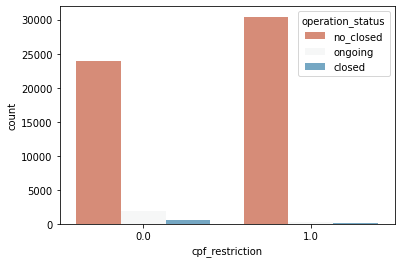

In [96]:
status = df['operation_status'].unique()
cpf = df['cpf_restriction'].unique()
plt.figure()
sns.countplot(x = 'cpf_restriction',hue ='operation_status', data=df, palette='RdBu')
plt.show()

Vamos aplicar esse filtro e vê se ele restringe bem nosso dataset

In [97]:
df_cpf_clean = df[df['cpf_restriction'] == 0]

In [98]:
df_cpf_clean.shape

(26347, 20)

Vemos que reduziu a metade. Vamos verificar quantos ainda são aprovados

In [99]:
df_cpf_clean['operation_status'].value_counts()

no_closed    23879
ongoing       1898
closed         570
Name: operation_status, dtype: int64

Perdemos 69 clientes, mas vimos na análise acima que eles eram pontos fora da curva (outliers)

#Carro

In [100]:
table_2 = pd.pivot_table(df, index='operation_status', columns='car', aggfunc='count')
table_2

auto_debt          auto_value  ... specific_type  state         
car                      0        1          0  ...             1      0        1
operation_status                                ...                              
closed                 NaN    639.0        NaN  ...         639.0    NaN    639.0
no_closed            241.0  54070.0      241.0  ...       54070.0  241.0  54070.0
ongoing                NaN   2232.0        NaN  ...        2232.0    NaN   2232.0

[3 rows x 36 columns]

In [101]:
table_3 = pd.pivot_table(df, index='salary', columns='car', aggfunc='count')
table_3

auto_debt        auto_value         ... specific_type        state       
car            0      1          0      1  ...             0      1     0      1
salary                                     ...                                  
0            228    537        228    537  ...           228    537   228    537
1             13  56404         13  56404  ...            13  56404    13  56404

[2 rows x 36 columns]

#Monthly Income

In [102]:
income = df_cpf_clean[df_cpf_clean['salary'] != 0]
income.shape

(25956, 20)

In [103]:
income['operation_status'].value_counts()

no_closed    23509
ongoing       1883
closed         564
Name: operation_status, dtype: int64

Vemos aqui que o o salário é um fator que influencia, mas vamos ainda contar os 6, porque sabemos que eles possuem carro

In [104]:
no_income = df_cpf_clean[(df_cpf_clean['salary'] == 0)&(df_cpf_clean['operation_status'] == 'closed')]
no_income

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
38393,951836,Auto Equity,2015-12-28,female,8/6/1978,11.0,0.0,SP,0.0,0,Fiat,2010.0,25000.0,0.0,10000.0,NaN,closed,1,0,15000.0
54197,1043654,Auto Equity,2016-03-16,NaN,1/28/1957,21.0,0.0,RJ,0.0,0,Hyundai,2010.0,35000.0,0.0,31500.0,NaN,closed,1,0,3500.0
55827,941886,Auto Equity,2015-12-14,male,7/2/1972,13.0,0.0,SP,0.0,0,Hyundai,2012.0,86000.0,0.0,50000.0,NaN,closed,1,0,36000.0
56166,1038585,Auto Equity,2016-03-13,NaN,2/20/1980,11.0,0.0,SP,0.0,0,VW - VolksWagen,2013.0,100000.0,0.0,60000.0,NaN,closed,1,0,40000.0
56335,797169,Auto Equity,2015-06-06,male,9/24/1972,51.0,0.0,RS,0.0,0,Toyota,2007.0,84000.0,0.0,75600.0,NaN,closed,1,0,8400.0
56514,836145,Auto Equity,2015-07-28,male,12/6/1959,11.0,0.0,SP,0.0,0,Mitsubishi,2014.0,158000.0,0.0,142200.0,NaN,closed,1,0,15800.0


In [105]:
table_3 = pd.pivot_table(df, index='operation_status', columns='salary', aggfunc='count')
table_3['id']

salary,0,1
operation_status,,
closed,6,633
no_closed,744,53567
ongoing,15,2217


# Predicting Category

In [106]:
import sklearn

In [107]:
df.head()

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed,1,1,11000.0
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed,1,1,900.0
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed,1,1,1000.0
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed,1,1,700.0
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed,1,1,2500.0


In [108]:
X = df[['monthly_income','cpf_restriction','auto_value','auto_debt','loan_amount']]
y = df['operation_status'].apply(lambda x: 0 if  x == 'no_closed' else 1)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9415056395908018

In [111]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
#Compare the truth wiht our predictions

y_pred_rf = rf.predict(X_test)
np.mean(y_pred_rf == y_test)

0.9415056395908018

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10853
           1       0.18      0.04      0.07       584

    accuracy                           0.94     11437
   macro avg       0.57      0.52      0.52     11437
weighted avg       0.91      0.94      0.92     11437

[[10744   109]
 [  560    24]]
0.9415056395908018


In [114]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)
y_pred_log = logreg.predict(X_test)


print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10853
           1       0.00      0.00      0.00       584

    accuracy                           0.95     11437
   macro avg       0.47      0.50      0.49     11437
weighted avg       0.90      0.95      0.92     11437

[[10853     0]
 [  584     0]]
0.9489376584768733


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Predict Proba

`predict_proba()` returns probability of a classifcation label

In [116]:
y_proba1 = rf.predict_proba(X_test)
y_proba1[:5]

array([[1.       , 0.       ],
       [1.       , 0.       ],
       [0.9      , 0.1      ],
       [0.9742653, 0.0257347],
       [1.       , 0.       ]])

In [117]:
y_proba2 = logreg.predict_proba(X_test)
y_proba2[:5]

array([[0.99109348, 0.00890652],
       [0.90956557, 0.09043443],
       [0.98459625, 0.01540375],
       [0.99124138, 0.00875862],
       [0.99170993, 0.00829007]])

In [118]:
df.head()

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed,1,1,11000.0
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed,1,1,900.0
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed,1,1,1000.0
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed,1,1,700.0
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed,1,1,2500.0


In [125]:
y_p = logreg.predict_proba(X)

In [128]:
y_p[:,1]

array([0.00966923, 0.00777304, 0.0078148 , ..., 0.00740699, 0.00764291,
       0.10649425])

In [129]:
df['approval_prob'] = y_p[:,1]

In [130]:
df.head()

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,car,salary,index,approval_prob
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed,1,1,11000.0,0.009669
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed,1,1,900.0,0.007773
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed,1,1,1000.0,0.007815
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed,1,1,700.0,0.007690
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed,1,1,2500.0,0.008469


#Q1 2013


In [ ]:
q1_2013 = df[df['created_at'] < '4-13-2013']
q1_2013

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
11,124406,Auto Equity,2013-03-19,NaN,1/13/1987,38.0,700.0,NO_STATE,1.0,0,wolksvagen,2007.0,25000.0,0.0,0.0,0.0,no_closed,25700.0
16,124412,Auto Equity,2013-03-21,NaN,6/14/1994,98.0,700.0,NO_STATE,1.0,0,honda,2011.0,5000.0,0.0,0.0,0.0,no_closed,5700.0
18,124497,Auto Equity,2013-04-08,NaN,5/23/1971,19.0,900.0,NO_STATE,1.0,0,ybr,2002.0,0.0,0.0,0.0,0.0,no_closed,900.0
19,124501,Auto Equity,2013-04-09,NaN,6/30/1983,15.0,1200.0,NO_STATE,1.0,0,verona,1996.0,6000.0,0.0,0.0,0.0,no_closed,7200.0
21,124492,Auto Equity,2013-04-07,NaN,8/16/1967,11.0,2000.0,NO_STATE,1.0,0,kasinski,2008.0,0.0,0.0,0.0,1.0,no_closed,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56501,129183,Auto Equity,2013-03-20,NaN,NaN,11.0,30000.0,NO_STATE,1.0,0,chevrolet,2011.0,0.0,0.0,120000.0,0.0,no_closed,-90000.0
56503,129837,Auto Equity,2013-04-09,NaN,NaN,19.0,0.0,NO_STATE,1.0,0,Chevrolet,2011.0,0.0,0.0,130000.0,0.0,no_closed,-130000.0
56519,127810,Auto Equity,2013-01-08,NaN,NaN,41.0,20000.0,NO_STATE,1.0,0,Scania,2004.0,0.0,0.0,150000.0,1.0,no_closed,-130000.0
56521,128569,Auto Equity,2013-02-25,NaN,NaN,11.0,15000.0,NO_STATE,1.0,0,bmw,2012.0,0.0,0.0,150000.0,1.0,no_closed,-135000.0


In [ ]:
q1_2013['operation_status'].value_counts()

no_closed    2439
closed         32
Name: operation_status, dtype: int64

In [ ]:
q1_2013['operation_status'].isnull().sum()

0

In [ ]:
q1_2013['registration_form_closed'].value_counts()

0    2471
Name: registration_form_closed, dtype: int64

In [ ]:
q1_2013['auto_debt'].unique()

array([0.])

In [ ]:
q1_2013['auto_debt'].sum()

0.0

In [ ]:
q1_2013['registration_form_closed'].value_counts()

0    2471
Name: registration_form_closed, dtype: int64

In [ ]:
0q1_2013['state'].isnull().sum()

0

#Q2 2013


In [ ]:
q2_2013 = df[(df['created_at'] >= '4-13-2013')&(df['created_at'] < '7-13-2013')]
q2_2013

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
5,125045,Auto Equity,2013-05-27,female,11/4/1969,11.0,2000.0,NO_STATE,1.0,0,fieti,2005.0,40000.0,0.0,0.0,0.0,no_closed,42000.0
6,124595,Auto Equity,2013-04-19,NaN,8/9/1979,44.0,1000.0,NO_STATE,1.0,0,chevrole,1998.0,0.0,0.0,0.0,0.0,no_closed,1000.0
9,125455,Auto Equity,2013-07-10,NaN,2/24/1978,15.0,1674.0,NO_STATE,1.0,0,FORD,2000.0,11000.0,0.0,0.0,0.0,no_closed,12674.0
12,124869,Auto Equity,2013-05-16,NaN,10/4/1957,71.0,3000.0,NO_STATE,1.0,0,fiat,2008.0,20000.0,0.0,0.0,1.0,no_closed,23000.0
13,125126,Auto Equity,2013-06-05,female,9/25/1975,37.0,2000.0,NO_STATE,1.0,0,FORD,1996.0,7000.0,0.0,0.0,1.0,no_closed,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56520,131512,Auto Equity,2013-06-04,NaN,NaN,11.0,20800.0,SP,1.0,0,VW,2011.0,0.0,0.0,150000.0,0.0,no_closed,-129200.0
56527,130891,Auto Equity,2013-05-09,NaN,NaN,21.0,22428.0,NO_STATE,1.0,0,land rover,2010.0,0.0,0.0,175000.0,1.0,no_closed,-152572.0
56532,124905,Auto Equity,2013-05-20,female,4/28/1980,62.0,0.0,NO_STATE,1.0,0,ferrari,2012.0,0.0,0.0,200000.0,1.0,no_closed,-200000.0
56547,124882,Auto Equity,2013-05-17,male,8/21/1990,62.0,0.0,NO_STATE,1.0,0,ferrari,2013.0,0.0,0.0,0.0,1.0,no_closed,0.0


In [ ]:
q2_2013['operation_status'].value_counts()

no_closed    2767
closed          2
Name: operation_status, dtype: int64

In [ ]:
q2_2013['operation_status'].isnull().sum()

0

In [ ]:
q2_2013['registration_form_closed'].value_counts()

0    2769
Name: registration_form_closed, dtype: int64

In [ ]:
q2_2013['auto_debt'].sum()

0.0

In [ ]:
q1_2013['state']

11       NO_STATE
16       NO_STATE
18       NO_STATE
19       NO_STATE
21       NO_STATE
           ...   
56501    NO_STATE
56503    NO_STATE
56519    NO_STATE
56521    NO_STATE
56522    NO_STATE
Name: state, Length: 2471, dtype: object

In [ ]:
q1_2013['registration_form_closed'].value_counts()

0    2471
Name: registration_form_closed, dtype: int64

#Q3 2013

In [ ]:
q3_2013 = df[(df['created_at'] >= '7-13-2013')&(df['created_at'] < '10-13-2013')]
q3_2013

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
0,126413,Auto Equity,2013-09-28,male,11/13/1971,85.0,4000.0,NO_STATE,1.0,0,wokvagem,1995.0,7000.0,0.0,0.0,0.0,no_closed,11000.0
1,125610,Auto Equity,2013-07-22,NaN,5/17/1991,31.0,900.0,NO_STATE,1.0,0,fiat,1999.0,0.0,0.0,0.0,1.0,no_closed,900.0
2,126523,Auto Equity,2013-10-03,female,1/14/1984,22.0,1000.0,NO_STATE,1.0,0,honda,2011.0,0.0,0.0,0.0,0.0,no_closed,1000.0
3,125820,Auto Equity,2013-08-12,female,7/7/1995,81.0,700.0,NO_STATE,1.0,0,fiat,2013.0,0.0,0.0,0.0,1.0,no_closed,700.0
4,125863,Auto Equity,2013-08-16,male,12/23/1991,11.0,2500.0,NO_STATE,1.0,0,volkswagen,2008.0,0.0,0.0,0.0,0.0,no_closed,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56402,132180,Auto Equity,2013-08-14,NaN,NaN,19.0,4000.0,NO_STATE,1.0,0,vw,2007.0,0.0,0.0,90000.0,1.0,no_closed,-86000.0
56441,132319,Auto Equity,2013-09-27,NaN,NaN,12.0,5000.0,SP,1.0,0,POLO,2009.0,0.0,0.0,100000.0,1.0,no_closed,-95000.0
56504,132235,Auto Equity,2013-09-02,NaN,NaN,11.0,0.0,NO_STATE,1.0,0,Chevrolet,2012.0,0.0,0.0,130000.0,1.0,no_closed,-130000.0
56517,126433,Auto Equity,2013-09-30,NaN,1/25/1982,31.0,16500.0,MG,1.0,0,volvo,2012.0,343000.0,0.0,150000.0,1.0,no_closed,209500.0


In [ ]:
q3_2013['operation_status'].value_counts()

no_closed    1295
closed          4
Name: operation_status, dtype: int64

In [ ]:
q3_2013['operation_status'].isnull().sum()

0

In [ ]:
q3_2013['registration_form_closed'].value_counts()

0    1299
Name: registration_form_closed, dtype: int64

In [ ]:
q3_2013['auto_debt'].sum()

0.0

In [ ]:
q1_2013['registration_form_closed'].value_counts()

0    2471
Name: registration_form_closed, dtype: int64

In [ ]:
q1_2013['state'].isnull().sum()

0

#Q4 2013

In [ ]:
q4_2013 = df[(df['created_at'] >= '10-13-2013')&(df['created_at'] < '1-14-2014')]
q4_2013

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
22,126677,Auto Equity,2013-10-17,NaN,10/19/1989,12.0,900.0,NO_STATE,1.0,0,ford,2007.0,19000.0,0.0,0.0,0.0,no_closed,19900.0
33,126837,Auto Equity,2013-10-31,NaN,9/22/1973,53.0,1200.0,NO_STATE,1.0,0,vw,2006.0,23000.0,0.0,1000.0,0.0,no_closed,23200.0
39,126660,Auto Equity,2013-10-16,female,3/4/1991,15.0,1000.0,NO_STATE,1.0,0,FORD,1988.0,10000.0,0.0,1000.0,0.0,no_closed,10000.0
44,126722,Auto Equity,2013-10-22,NaN,6/18/1963,51.0,1500.0,NO_STATE,1.0,0,fiat,1995.0,8000.0,0.0,1000.0,0.0,no_closed,8500.0
45,126723,Auto Equity,2013-10-22,NaN,6/18/1963,51.0,1500.0,NO_STATE,1.0,0,fiat,1995.0,8000.0,0.0,1000.0,0.0,no_closed,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57039,126704,Auto Equity,2013-10-21,female,8/28/1979,11.0,2200.0,NO_STATE,1.0,0,Chevrolet,2010.0,59000.0,0.0,20000.0,0.0,no_closed,41200.0
57048,126708,Auto Equity,2013-10-21,male,3/23/1992,94.0,4000.0,NO_STATE,1.0,0,ford,2011.0,27000.0,0.0,20000.0,0.0,no_closed,11000.0
57095,126684,Auto Equity,2013-10-18,NaN,7/10/1984,48.0,6300.0,NO_STATE,1.0,0,Citroen,2010.0,38000.0,0.0,0.0,1.0,no_closed,44300.0
57109,126663,Auto Equity,2013-10-16,NaN,8/24/1979,92.0,3000.0,NO_STATE,1.0,0,Chevrolet,2011.0,25000.0,0.0,22500.0,1.0,no_closed,5500.0


In [ ]:
q4_2013['operation_status'].value_counts()

no_closed    1018
Name: operation_status, dtype: int64

In [ ]:
q4_2013['operation_status'].isnull().sum()

0

In [ ]:
q4_2013['registration_form_closed'].value_counts()

0    1018
Name: registration_form_closed, dtype: int64

In [ ]:
q4_2013['auto_debt'].sum()

0.0

#Q4 2013

In [ ]:
q1_2014 = df[(df['created_at'] >= '1-14-2014')&(df['created_at'] < '4-14-2014')]
q1_2014

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2324,322622,Auto Equity,2014-03-14,NaN,6/20/1973,54.0,7000.0,RS,1.0,0,GM - Chevrolet,2011.0,29000.0,0.0,5000.0,NaN,no_closed,31000.0
2362,175819,Auto Equity,2014-01-17,NaN,4/28/1980,32.0,0.0,MG,1.0,0,GM - Chevrolet,2012.0,25900.0,0.0,5000.0,NaN,no_closed,20900.0
2481,340249,Auto Equity,2014-04-11,male,5/11/1981,67.0,1920.0,MS,1.0,0,GM - Chevrolet,NaN,21000.0,0.0,5000.0,NaN,no_closed,17920.0
2523,326711,Auto Equity,2014-03-26,NaN,10/18/1992,16.0,2200.0,SP,1.0,0,VW - VolksWagen,2006.0,20000.0,0.0,5000.0,NaN,no_closed,17200.0
2618,340380,Auto Equity,2014-04-12,male,11/9/1982,27.0,1500.0,ES,1.0,0,Fiat,NaN,19000.0,0.0,5000.0,NaN,no_closed,15500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56612,174682,Auto Equity,2014-01-14,NaN,12/28/1980,16.0,0.0,SP,1.0,0,Ford,2013.0,0.0,0.0,0.0,NaN,no_closed,0.0
56614,325367,Auto Equity,2014-03-24,NaN,8/4/1973,11.0,0.0,SP,1.0,0,VW - VolksWagen,2012.0,0.0,0.0,0.0,NaN,no_closed,0.0
56617,332879,Auto Equity,2014-04-02,NaN,7/12/1985,11.0,0.0,SP,1.0,0,Hyundai,2007.0,0.0,0.0,0.0,NaN,no_closed,0.0
56620,321154,Auto Equity,2014-03-09,NaN,6/9/1964,83.0,0.0,PB,1.0,0,Toyota,2009.0,0.0,0.0,0.0,NaN,no_closed,0.0


In [ ]:
q1_2014['operation_status'].value_counts()

no_closed    894
closed         8
Name: operation_status, dtype: int64

In [ ]:
q1_2014['operation_status'].isnull().sum()

0

In [ ]:
q1_2014['registration_form_closed'].value_counts()

0    902
Name: registration_form_closed, dtype: int64

In [ ]:
q1_2014['auto_debt'].sum()

0.0

#Q2 2014

In [ ]:
q2_2014 = df[(df['created_at'] >= '4-14-2014')&(df['created_at'] < '7-14-2014')]
q2_2014

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2229,363576,Auto Equity,2014-05-08,female,7/30/1972,47.0,4000.0,SC,1.0,0,Renault,NaN,39000.0,0.0,5000.0,NaN,no_closed,38000.0
2284,351418,Auto Equity,2014-04-25,NaN,7/11/1987,34.0,2400.0,MG,1.0,0,Fiat,2012.0,32000.0,0.0,5000.0,NaN,no_closed,29400.0
2320,372264,Auto Equity,2014-05-16,female,9/20/1976,69.0,3000.0,RO,1.0,0,Fiat,NaN,30000.0,0.0,5000.0,NaN,no_closed,28000.0
2341,367526,Auto Equity,2014-05-12,male,7/15/1963,27.0,4000.0,ES,1.0,0,Fiat,NaN,28000.0,0.0,5000.0,NaN,no_closed,27000.0
2351,420936,Auto Equity,2014-07-03,male,12/20/1993,66.0,3000.0,MT,1.0,0,GM - Chevrolet,2006.0,26000.0,0.0,5000.0,NaN,no_closed,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56607,367348,Auto Equity,2014-05-12,NaN,7/16/1978,11.0,0.0,SP,1.0,0,Kia Motors,2012.0,0.0,0.0,0.0,NaN,no_closed,0.0
56608,376174,Auto Equity,2014-05-20,NaN,3/14/1952,11.0,0.0,SP,1.0,0,GM - Chevrolet,2012.0,0.0,0.0,0.0,NaN,no_closed,0.0
56616,361274,Auto Equity,2014-05-06,NaN,7/17/1976,11.0,0.0,SP,1.0,0,GM - Chevrolet,2012.0,0.0,0.0,0.0,NaN,no_closed,0.0
56618,400705,Auto Equity,2014-06-15,NaN,3/12/1981,11.0,0.0,SP,0.0,0,Hyundai,2011.0,0.0,0.0,0.0,NaN,no_closed,0.0


In [ ]:
q2_2014['operation_status'].value_counts()

no_closed    1877
closed         41
Name: operation_status, dtype: int64

In [ ]:
q2_2014['operation_status'].isnull().sum()

0

In [ ]:
q2_2014['registration_form_closed'].value_counts()

0    1918
Name: registration_form_closed, dtype: int64

In [ ]:
q2_2014['auto_debt'].sum()

2590117.0

#Q3 2014

In [ ]:
q3_2014 = df[(df['created_at'] >= '7-14-2014')&(df['created_at'] < '10-14-2014')]
q3_2014

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2221,516657,Auto Equity,2014-09-05,female,5/22/1964,31.0,2500.0,MG,1.0,0,Fiat,2009.0,40000.0,0.0,5000.0,NaN,no_closed,37500.0
2222,521301,Auto Equity,2014-09-11,female,5/22/1964,31.0,2500.0,MG,1.0,0,Fiat,2009.0,40000.0,0.0,5000.0,NaN,no_closed,37500.0
2237,508136,Auto Equity,2014-08-27,female,12/3/1977,61.0,2100.0,DF,0.0,0,Renault,2014.0,38000.0,0.0,5000.0,NaN,no_closed,35100.0
2245,515998,Auto Equity,2014-09-05,male,7/21/1970,61.0,5200.0,DF,1.0,0,Honda,2014.0,36000.0,0.0,5000.0,NaN,no_closed,36200.0
2256,543255,Auto Equity,2014-10-09,female,5/11/1963,31.0,4000.0,MG,1.0,0,Fiat,2014.0,35000.0,0.0,5000.0,NaN,no_closed,34000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56488,510592,Auto Equity,2014-08-30,male,5/24/1983,11.0,12000.0,SP,0.0,0,VW - VolksWagen,2005.0,124000.0,0.0,111600.0,NaN,no_closed,24400.0
56536,527920,Auto Equity,2014-09-19,male,5/21/1968,11.0,0.0,SP,0.0,0,Porsche,2009.0,0.0,0.0,240000.0,NaN,no_closed,-240000.0
56559,457509,Auto Equity,2014-07-24,NaN,4/5/1986,19.0,0.0,SP,0.0,0,Fiat,2007.0,0.0,0.0,0.0,NaN,no_closed,0.0
56589,435967,Auto Equity,2014-07-15,NaN,10/20/1964,19.0,0.0,SP,0.0,0,Ford,2009.0,0.0,0.0,0.0,NaN,no_closed,0.0


In [ ]:
q3_2014['operation_status'].value_counts()

no_closed    2443
closed         58
Name: operation_status, dtype: int64

In [ ]:
q3_2014['operation_status'].isnull().sum()

0

In [ ]:
q3_2014['registration_form_closed'].value_counts()

0    2501
Name: registration_form_closed, dtype: int64

In [ ]:
q3_2014['auto_debt'].sum()

8649610.0

#Q4 2014

In [ ]:
q4_2014 = df[(df['created_at'] >= '10-14-2014')&(df['created_at'] < '1-15-2015')]
q4_2014

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2190,603825,Auto Equity,2014-12-30,male,3/10/1950,16.0,3500.0,SP,0.0,0,Mercedes-Benz,1988.0,70000.0,0.0,5000.0,NaN,no_closed,68500.0
2214,585433,Auto Equity,2014-12-01,female,4/8/1985,11.0,1200.0,SP,1.0,0,VW - VolksWagen,2013.0,45000.0,0.0,5000.0,NaN,no_closed,41200.0
2215,606033,Auto Equity,2015-01-03,female,5/10/1989,51.0,1200.0,RS,1.0,0,Audi,2014.0,45000.0,0.0,5000.0,NaN,no_closed,41200.0
2224,600292,Auto Equity,2014-12-23,female,6/21/1965,11.0,2000.0,SP,1.0,0,GM - Chevrolet,2010.0,40000.0,0.0,5000.0,NaN,no_closed,37000.0
2227,586469,Auto Equity,2014-12-02,male,7/25/1992,21.0,1500.0,RJ,1.0,0,GM - Chevrolet,2014.0,40000.0,0.0,5000.0,NaN,no_closed,36500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56425,550075,Auto Equity,2014-10-16,NaN,5/17/1978,11.0,0.0,SP,0.0,0,Jeep,2011.0,110000.0,0.0,99000.0,NaN,no_closed,11000.0
56479,579976,Auto Equity,2014-11-24,female,10/25/1971,31.0,25000.0,MG,0.0,0,Mercedes-Benz,2014.0,120000.0,0.0,108000.0,NaN,no_closed,37000.0
56480,567716,Auto Equity,2014-11-06,male,11/27/1969,22.0,15000.0,RJ,0.0,0,Mercedes-Benz,2011.0,120000.0,30000.0,108000.0,NaN,no_closed,-3000.0
56489,589513,Auto Equity,2014-12-08,female,2/3/1980,11.0,0.0,SP,0.0,0,Mercedes-Benz,2014.0,125000.0,90000.0,112500.0,NaN,no_closed,-77500.0


In [ ]:
q4_2014['operation_status'].value_counts()

no_closed    4010
closed         45
Name: operation_status, dtype: int64

In [ ]:
q4_2014['operation_status'].isnull().sum()

0

In [ ]:
q4_2014['registration_form_closed'].value_counts()

0    4055
Name: registration_form_closed, dtype: int64

In [ ]:
q4_2014['auto_debt'].sum()

12385315.0

#Q1 2015

In [ ]:
q1_2015 = df[(df['created_at'] >= '1-15-2015')&(df['created_at'] < '4-15-2015')]
q1_2015

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2216,659836,Auto Equity,2015-03-12,male,2/5/1991,24.0,2500.0,RJ,1.0,0,VW - VolksWagen,2014.0,45000.0,0.0,5000.0,NaN,no_closed,42500.0
2223,631566,Auto Equity,2015-02-04,female,3/17/1971,21.0,8000.0,RJ,1.0,0,Peugeot,2009.0,40000.0,0.0,5000.0,NaN,no_closed,43000.0
2226,651851,Auto Equity,2015-03-03,male,3/23/1993,16.0,4000.0,SP,1.0,0,Citroën,2014.0,40000.0,0.0,5000.0,NaN,no_closed,39000.0
2233,720358,Auto Equity,2015-04-11,male,4/6/1974,41.0,2000.0,PR,1.0,0,Kia Motors,2010.0,38000.0,0.0,5000.0,NaN,no_closed,35000.0
2235,696644,Auto Equity,2015-03-27,male,1/11/1967,71.0,5000.0,BA,1.0,0,Fiat,2013.0,38000.0,0.0,5000.0,NaN,no_closed,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57094,643642,Auto Equity,2015-02-20,NaN,7/20/1988,85.0,0.0,SP,1.0,0,NaN,NaN,0.0,0.0,20000.0,NaN,no_closed,-20000.0
57176,637252,Auto Equity,2015-02-11,NaN,11/13/1949,19.0,0.0,SP,1.0,0,NaN,NaN,0.0,0.0,0.0,NaN,no_closed,0.0
57177,637329,Auto Equity,2015-02-11,NaN,5/27/1989,31.0,0.0,SP,1.0,0,NaN,NaN,0.0,0.0,0.0,NaN,no_closed,0.0
57178,637370,Auto Equity,2015-02-11,NaN,5/26/1952,41.0,0.0,PE,1.0,0,NaN,NaN,0.0,0.0,0.0,NaN,no_closed,0.0


In [ ]:
q1_2015['operation_status'].value_counts()

no_closed    5863
closed         79
Name: operation_status, dtype: int64

In [ ]:
q1_2015['operation_status'].isnull().sum()

0

In [ ]:
q1_2015['registration_form_closed'].value_counts()

0    5942
Name: registration_form_closed, dtype: int64

In [ ]:
q1_2015['auto_debt'].sum()

15975250.0

#Q2 2015

In [ ]:
q2_2015 = df[(df['created_at'] >= '4-15-2015')&(df['created_at'] < '7-15-2015')]
q2_2015

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2173,780948,Auto Equity,2015-05-17,male,7/19/1989,21.0,1200.0,RJ,1.0,0,fiat,1998.0,9000.0,2337.0,2500.0,0.0,no_closed,5363.0
2176,824908,Auto Equity,2015-07-13,male,11/16/1993,47.0,1800.0,SC,1.0,0,fam,2012.0,4000.0,700.0,3000.0,0.0,no_closed,2100.0
2201,757103,Auto Equity,2015-04-27,female,4/29/1977,51.0,0.0,RS,1.0,0,Hyundai,2010.0,50000.0,0.0,5000.0,NaN,no_closed,45000.0
2218,785513,Auto Equity,2015-05-22,male,11/6/1971,85.0,3200.0,CE,0.0,0,Volvo,1998.0,40000.0,0.0,5000.0,NaN,no_closed,38200.0
2225,800296,Auto Equity,2015-06-09,female,7/6/1925,71.0,4500.0,BA,1.0,0,Peugeot,2013.0,40000.0,0.0,5000.0,NaN,no_closed,39500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56537,826371,Auto Equity,2015-07-14,male,8/2/1987,11.0,15000.0,SP,0.0,0,Uno,2015.0,25000.0,20000.0,250000.0,0.0,no_closed,-230000.0
56539,825677,Auto Equity,2015-07-14,male,10/16/1985,33.0,0.0,MG,0.0,0,Volvo,2013.0,300000.0,2000.0,270000.0,NaN,no_closed,28000.0
56542,775431,Auto Equity,2015-05-11,NaN,7/2/1969,21.0,0.0,RJ,0.0,0,Volvo,2010.0,0.0,0.0,405000.0,NaN,no_closed,-405000.0
56543,816813,Auto Equity,2015-06-30,female,5/18/1984,65.0,0.0,MT,0.0,0,Porsche,2014.0,0.0,100000.0,450000.0,NaN,no_closed,-550000.0


In [ ]:
q2_2015['operation_status'].value_counts()

no_closed    6839
closed        109
Name: operation_status, dtype: int64

In [ ]:
q2_2015['operation_status'].isnull().sum()

0

In [ ]:
q2_2015['registration_form_closed'].value_counts()

0    6947
1       1
Name: registration_form_closed, dtype: int64

In [ ]:
q2_2015['auto_debt'].sum()

22731166.0

#Q3 2015

In [ ]:
q3_2015 = df[(df['created_at'] >= '7-15-2015')&(df['created_at'] < '10-15-2015')]
q3_2015

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2194,844045,Auto Equity,2015-08-09,male,7/10/1959,43.0,2500.0,PR,0.0,1,VW - VolksWagen,2003.0,60000.0,0.0,5000.0,NaN,no_closed,57500.0
2196,898284,Auto Equity,2015-10-13,female,10/12/1976,11.0,10000.0,SP,1.0,0,Hyundai,2012.0,54000.0,0.0,5000.0,NaN,no_closed,59000.0
2205,829314,Auto Equity,2015-07-18,female,4/11/1977,62.0,2200.0,GO,1.0,0,Fiat,2014.0,48000.0,0.0,5000.0,NaN,no_closed,45200.0
2207,860825,Auto Equity,2015-08-29,male,12/29/1991,21.0,1800.0,RJ,1.0,0,Ferrari,2010.0,46000.0,0.0,5000.0,NaN,no_closed,42800.0
2220,894193,Auto Equity,2015-10-07,female,9/25/1954,11.0,2180.0,SP,1.0,0,Ford,2008.0,40000.0,0.0,5000.0,NaN,no_closed,37180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56510,888058,Auto Equity,2015-09-30,male,11/3/1979,71.0,25000.0,BA,0.0,1,VW - VolksWagen,2011.0,150000.0,0.0,135000.0,NaN,no_closed,40000.0
56514,836145,Auto Equity,2015-07-28,male,12/6/1959,11.0,0.0,SP,0.0,0,Mitsubishi,2014.0,158000.0,0.0,142200.0,NaN,closed,15800.0
56524,843570,Auto Equity,2015-08-08,male,7/4/1982,67.0,29000.0,MS,0.0,0,BMW,2014.0,182000.0,188000.0,163800.0,NaN,no_closed,-140800.0
56530,854343,Auto Equity,2015-08-21,male,9/23/1980,11.0,28000.0,SP,0.0,0,BMW,2014.0,335000.0,0.0,0.0,NaN,no_closed,363000.0


In [ ]:
q3_2015['operation_status'].value_counts()

no_closed    6319
closed        107
Name: operation_status, dtype: int64

In [ ]:
q3_2015['operation_status'].isnull().sum()

0

In [ ]:
q3_2015['registration_form_closed'].value_counts()

0    5651
1     775
Name: registration_form_closed, dtype: int64

In [ ]:
q3_2015['auto_debt'].sum()

19986501.0

#Q4 2015

In [ ]:
q4_2015 = df[(df['created_at'] >= '10-15-2015')&(df['created_at'] < '1-16-2016')]
q4_2015

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2197,917049,Auto Equity,2015-11-10,male,7/27/1993,11.0,2500.0,SP,1.0,0,VW - VolksWagen,2014.0,53000.0,0.0,5000.0,NaN,no_closed,50500.0
2199,904337,Auto Equity,2015-10-22,male,10/25/1978,11.0,2000.0,SP,1.0,0,Peugeot,2008.0,50000.0,0.0,5000.0,NaN,no_closed,47000.0
2202,921462,Auto Equity,2015-11-17,male,3/21/1978,21.0,3000.0,RJ,1.0,0,Fiat,2012.0,50000.0,0.0,5000.0,NaN,no_closed,48000.0
2209,924497,Auto Equity,2015-11-21,female,7/27/1960,51.0,1500.0,RS,1.0,0,Fiat,1997.0,45000.0,0.0,5000.0,NaN,no_closed,41500.0
2254,902789,Auto Equity,2015-10-20,male,2/8/1984,31.0,3500.0,MG,1.0,0,GM - Chevrolet,2013.0,35000.0,0.0,5000.0,NaN,no_closed,33500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56840,904122,Auto Equity,2015-10-21,NaN,4/27/1989,85.0,2600.0,CE,0.0,0,Fiat,2008.0,10000.0,0.0,9000.0,NaN,no_closed,3600.0
57045,903224,Auto Equity,2015-10-20,male,7/28/1975,47.0,5000.0,SC,0.0,0,VW - VolksWagen,2012.0,30500.0,0.0,20000.0,NaN,no_closed,15500.0
57108,903213,Auto Equity,2015-10-20,male,11/20/1973,11.0,10000.0,SP,0.0,1,Toyota,2007.0,25000.0,0.0,22500.0,NaN,no_closed,12500.0
57154,904163,Auto Equity,2015-10-21,male,9/14/1953,22.0,6500.0,RJ,0.0,0,Ford,2014.0,42000.0,2650.0,37800.0,NaN,no_closed,8050.0


In [ ]:
q4_2015['operation_status'].value_counts()

no_closed    6979
ongoing       359
closed         68
Name: operation_status, dtype: int64

In [ ]:
q4_2015['operation_status'].isnull().sum()

0

In [ ]:
q4_2015['registration_form_closed'].value_counts()

0    6235
1    1171
Name: registration_form_closed, dtype: int64

In [ ]:
q4_2015['auto_debt'].sum()

20095557.0

#Q1 2016

In [ ]:
q1_2016 = df[(df['created_at'] >= '1-16-2016')&(df['created_at'] < '4-16-2016')]
q1_2016

,id,specific_type,created_at,gender,birth_date,phone_code,monthly_income,state,cpf_restriction,registration_form_closed,brand,model_year,auto_value,auto_debt,loan_amount,declares_income_tax,operation_status,index
2180,1010551,Auto Equity,2016-02-21,male,8/4/1942,16.0,3000.0,SP,1.0,0,GM - Chevrolet,2004.0,0.0,0.0,5000.0,NaN,no_closed,-2000.0
2181,1022100,Auto Equity,2016-03-01,male,2/2/1980,47.0,1200.0,SC,1.0,0,GM - Chevrolet,1991.0,0.0,0.0,5000.0,NaN,no_closed,-3800.0
2182,1032825,Auto Equity,2016-03-09,male,8/17/1975,98.0,1300.0,MA,0.0,0,GM - Chevrolet,2014.0,200000.0,0.0,5000.0,NaN,no_closed,196300.0
2183,1032855,Auto Equity,2016-03-09,male,8/17/1975,98.0,1300.0,MA,0.0,0,GM - Chevrolet,2014.0,200000.0,0.0,5000.0,NaN,no_closed,196300.0
2184,985904,Auto Equity,2016-01-31,male,5/8/1974,27.0,1600.0,ES,1.0,1,VW - VolksWagen,2002.0,180000.0,0.0,5000.0,NaN,no_closed,176600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57172,1022736,Auto Equity,2016-03-01,female,3/30/1965,21.0,15000.0,RJ,0.0,0,Audi,2015.0,100000.0,0.0,90000.0,NaN,no_closed,25000.0
57173,1029882,Auto Equity,2016-03-07,NaN,1/26/1971,21.0,24000.0,RJ,1.0,0,Fiat,2013.0,39548.0,0.0,100000.0,NaN,no_closed,-36452.0
57174,1041250,Auto Equity,2016-03-15,NaN,5/8/1978,17.0,20000.0,SP,0.0,0,GM - Chevrolet,2011.0,130000.0,0.0,117000.0,NaN,no_closed,33000.0
57180,1025857,Auto Equity,2016-03-03,male,11/20/1954,11.0,1300.0,NO_STATE,1.0,1,Ford,2010.0,0.0,0.0,10000.0,NaN,no_closed,-8700.0


In [ ]:
q1_2016['operation_status'].value_counts()

no_closed    11568
ongoing       1873
closed          86
Name: operation_status, dtype: int64

In [ ]:
q1_2016['operation_status'].isnull().sum()

0

In [ ]:
q1_2016['registration_form_closed'].value_counts()

0    11529
1     1998
Name: registration_form_closed, dtype: int64

In [ ]:
q1_2016['auto_debt'].sum()

49897344.0

# Cálculos

In [ ]:
true_close[['state','loan_amount']].groupby('state').sum()

,loan_amount
state,
AM,126300.0
BA,210556.0
CE,156750.0
DF,734260.0
ES,18000.0
GO,87500.0
MA,12000.0
MG,826423.0
MS,93900.0


In [ ]:
#cpf limpo, não tem carro, não recebe salário
X_1 = 'cpf_restriction'
X_2 = 'car'
X_3 = 'salary'
X_000 = df[(df[X_1]==0) & (df[X_2]==0) & (df[X_3]==0)]
print(X_000.shape)
X_000['operation_status'].value_counts()

(202, 20)


no_closed    202
Name: operation_status, dtype: int64

In [ ]:
#cpf sujo, não tem carro, não recebe salário
X_100 = df[(df[X_1]==1) & (df[X_2]==0) & (df[X_3]==0)]
print(X_100.shape)
X_100['operation_status'].value_counts()

(26, 20)


no_closed    26
Name: operation_status, dtype: int64

In [ ]:
#cpf limpo, tem carro, não recebe salário
X_010 = df[(df[X_1]==0) & (df[X_2]==1) & (df[X_3]==0)]
print(X_010.shape)
X_010['operation_status'].value_counts()

(189, 20)


no_closed    168
ongoing       15
closed         6
Name: operation_status, dtype: int64

In [ ]:
#cpf limpo, não tem carro, recebe salário
X_001 = df[(df[X_1]==0) & (df[X_2]==0) & (df[X_3]==1)]
print(X_001.shape)
X_001['operation_status'].value_counts()

(0, 20)


Series([], Name: operation_status, dtype: int64)

In [ ]:
#cpf limpo, tem carro, recebe salário
X_011 = df[(df[X_1]==0) & (df[X_2]==1) & (df[X_3]==1)]
print(X_011.shape)
print(X_011['operation_status'].value_counts())
X_011['loan_amount'].sum()

(25956, 20)
no_closed    23509
ongoing       1883
closed         564
Name: operation_status, dtype: int64


313096534.0

In [ ]:
#cpf sujo, não tem carro, recebe salário
X_101 = df[(df[X_1]==1) & (df[X_2]==0) & (df[X_3]==1)]
print(X_101.shape)
X_101['operation_status'].value_counts()

(13, 20)


no_closed    13
Name: operation_status, dtype: int64

In [ ]:
#cpf sujo, tem carro, não recebe salário
X_110 = df[(df[X_1]==1) & (df[X_2]==1) & (df[X_3]==0)]
print(X_110.shape)
X_110['operation_status'].value_counts()

(348, 20)


no_closed    348
Name: operation_status, dtype: int64

In [ ]:
#cpf sujo, tem carro, recebe salário
X_111 = df[(df[X_1]==1) & (df[X_2]==1) & (df[X_3]==1)]
print(X_111.shape)
X_111['operation_status'].value_counts()

(30448, 20)


no_closed    30045
ongoing        334
closed          69
Name: operation_status, dtype: int64

In [ ]:
6/189

0.031746031746031744

In [ ]:
564/25956

0.021729079981507166

In [ ]:
69/30448

0.002266158696794535

In [ ]:
#cpf sujo, tem carro,  não recebe salário
X = df[df[X_2]==1]
X['loan_amount'].mean()

12757.624769498252

In [ ]:
X[X[X_1] == 0]['operation_status'].value_counts() 

no_closed    23677
ongoing       1898
closed         570
Name: operation_status, dtype: int64

In [ ]:
p = 639/56941

In [ ]:
(X['loan_amount'].mean())*p - 10

133.1678795193162

In [ ]:
X = df[(df[X_2]==1)&(df[X_3]==1)]
X['operation_status'].value_counts()

no_closed    53554
ongoing       2217
closed         633
Name: operation_status, dtype: int64

In [ ]:
639/57182

0.011174845231016754